In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
data = pd.read_csv('sample_data/House_Rent_Dataset.csv')

In [ ]:
data.shape

(4746, 12)

In [ ]:
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


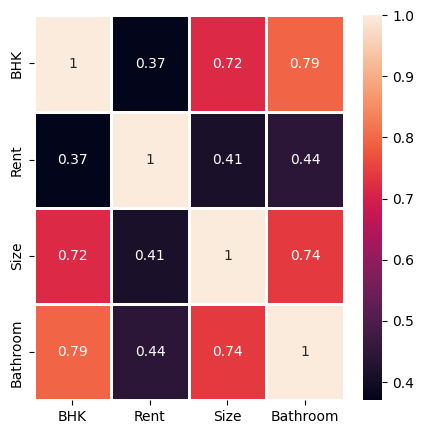

In [ ]:
# heatmap
# correlation
# +ve correlation -> if both values are increasing or decreasing
# -ve correlation -> if one value is increasing and other value is
#                     decreasing or vice versa

plt.figure(figsize=(5, 5))
sns.heatmap(data.corr(numeric_only=True),linewidth=2,annot=True) # color bar, color map, linewidth = 2, annot=True, cbar=False,
           #cmap='Blues', vmin=-0.5, vmax=0.5
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [ ]:
data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [ ]:
print(f"Mean Rent: {data.Rent.mean()}")
print(f"Median Rent: {data.Rent.median()}")
print(f"Highest Rent: {data.Rent.max()}")
print(f"Lowest Rent: {data.Rent.min()}")


Mean Rent: 34993.45132743363
Median Rent: 16000.0
Highest Rent: 3500000
Lowest Rent: 1200


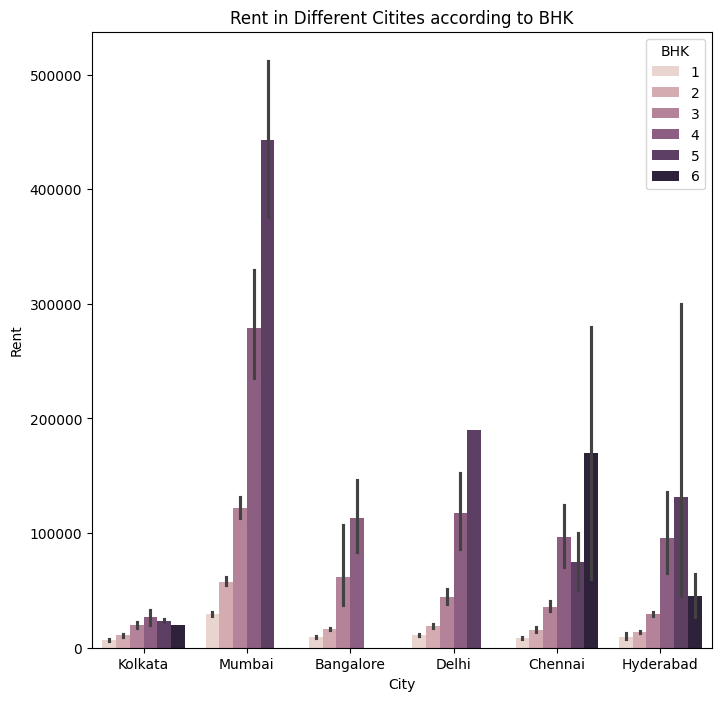

In [ ]:
plt.figure(figsize=(8, 8), dpi = 100) # dots per inch
sns.barplot(x=data['City'],y=data['Rent'],hue=data['BHK'])
plt.title('Rent in Different Citites according to BHK')
plt.show()

In [ ]:
figure = px.bar(data, x=data["City"],
                y = data["Rent"],
                color = data["BHK"],
            title="Rent in Different Cities According to BHK")
figure.show()

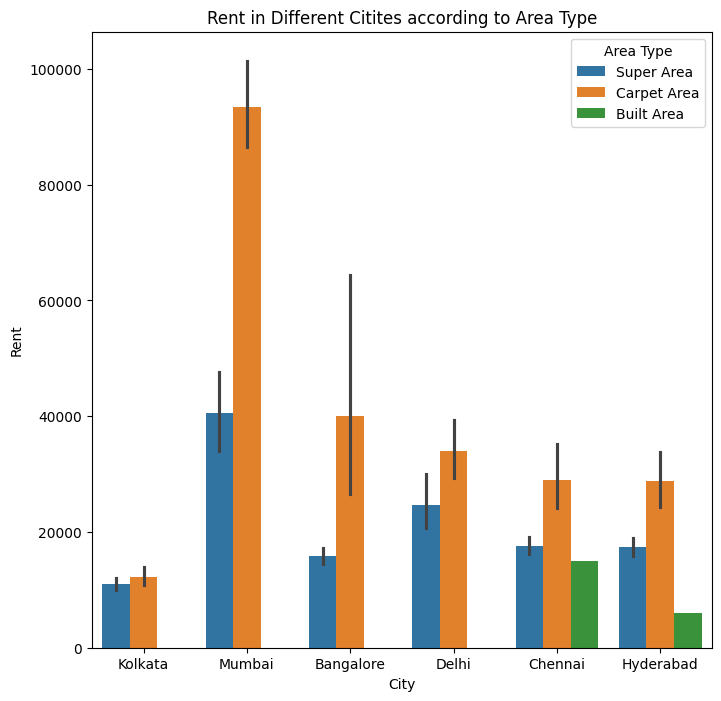

In [ ]:
plt.figure(figsize=(8, 8), dpi = 100) # dots per inch
sns.barplot(x=data['City'],y=data['Rent'],hue=data['Area Type'])
plt.title('Rent in Different Citites according to Area Type')
plt.show()


In [ ]:
figure = px.bar(data, x=data["City"],
                y = data["Rent"],
                color = data["Area Type"],
            title="Rent in Different Cities According to Area Type")
figure.show()

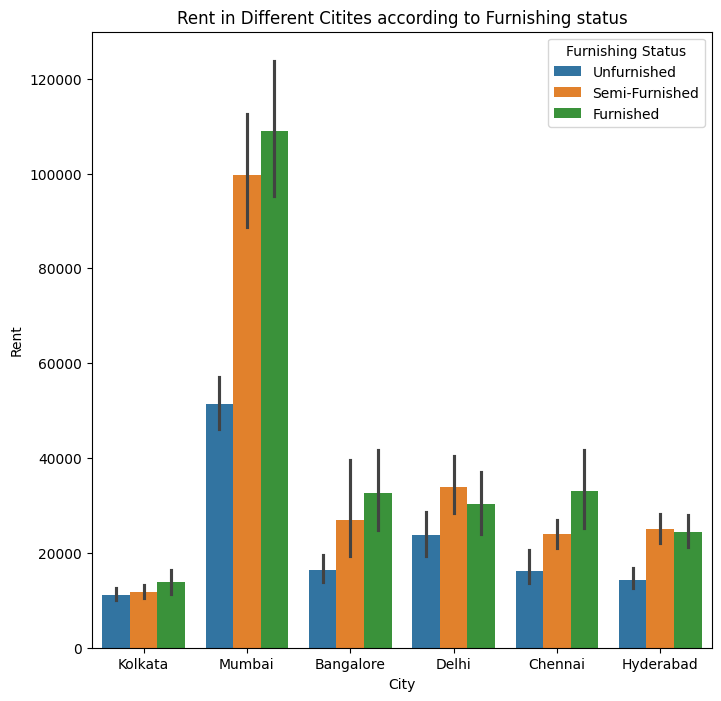

In [ ]:
plt.figure(figsize=(8, 8), dpi = 100) # dots per inch
sns.barplot(x=data['City'],y=data['Rent'],hue=data['Furnishing Status'])
plt.title('Rent in Different Citites according to Furnishing status')
plt.show()


In [ ]:
figure = px.bar(data, x=data["City"],
                y = data["Rent"],
                color = data["Furnishing Status"],
            title="Rent in Different Cities According to Furnishing Status")
figure.show()

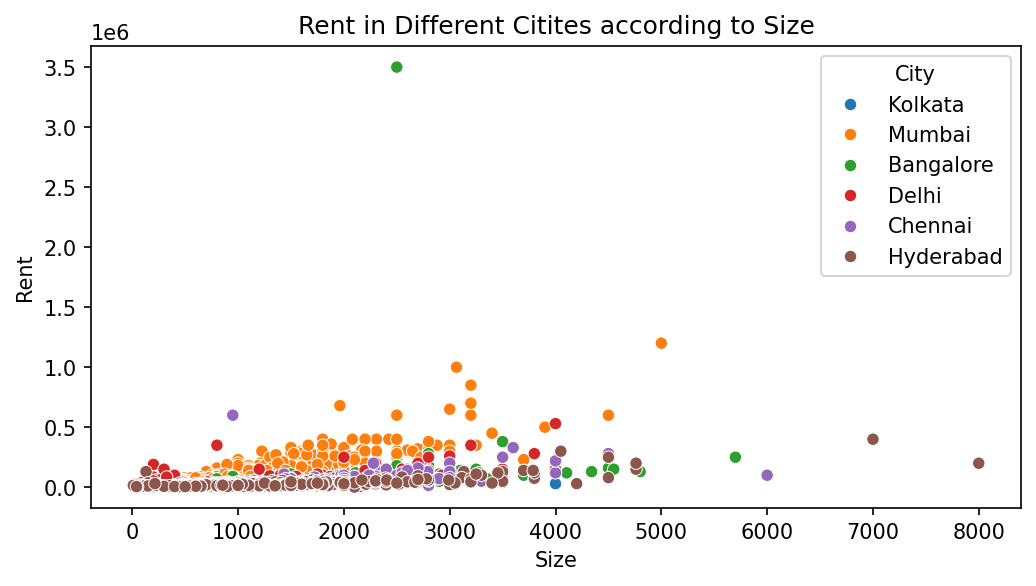

In [ ]:
plt.figure(figsize=(8,4),dpi=150) # dots per inch
sns.scatterplot(x=data['Size'],y=data['Rent'],hue=data['City'])
# sns.barplot(x=data['City'],y=data['Rent'],hue=data['Size'])
plt.title('Rent in Different Citites according to Size')
plt.show()


In [ ]:

figure = px.scatter_3d(data,
                    x="City",
                    y="Size",
                    z="Rent",
                    color='City',
                    title='Rent vs Size and City')
figure.show()


In [ ]:
figure = px.bar(data, x=data["City"],
                y = data["Rent"],
                color = data["Size"],
            title="Rent in Different Cities According to Size")
figure.show()

In [ ]:
cities = data["City"].value_counts()
label = cities.index
counts = cities.values
colors = ['red']

fig = go.Figure(data=[go.Pie(labels=label, values=counts, hole=0.5)])
fig.update_layout(title_text='Number of Houses Available for Rent')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

In [ ]:
# Preference of Tenant
tenant = data["Tenant Preferred"].value_counts()
label = tenant.index
counts = tenant.values
colors = ['gold']

fig = go.Figure(data=[go.Pie(labels=label, values=counts, hole=0.5)])
fig.update_layout(title_text='Preference of Tenant in India')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

In [ ]:
data["Area Type"] = data["Area Type"].map({"Super Area": 1,
                                           "Carpet Area": 2,
                                           "Built Area": 3})
data["City"] = data["City"].map({"Mumbai": 4000, "Chennai": 6000,
                                 "Bangalore": 5600, "Hyderabad": 5000,
                                 "Delhi": 1100, "Kolkata": 7000})
data["Furnishing Status"] = data["Furnishing Status"].map({"Unfurnished": 0,
                                                           "Semi-Furnished": 1,
                                                           "Furnished": 2})
data["Tenant Preferred"] = data["Tenant Preferred"].map({"Bachelors/Family": 2,
                                                         "Bachelors": 1,
                                                         "Family": 3})
print(data.head())

    Posted On  BHK   Rent  Size            Floor  Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2          1   
1  2022-05-13    2  20000   800       1 out of 3          1   
2  2022-05-16    2  17000  1000       1 out of 3          1   
3  2022-07-04    2  10000   800       1 out of 2          1   
4  2022-05-09    2   7500   850       1 out of 2          2   

              Area Locality  City  Furnishing Status  Tenant Preferred  \
0                    Bandel  7000                  0                 2   
1  Phool Bagan, Kankurgachi  7000                  1                 2   
2   Salt Lake City Sector 2  7000                  1                 2   
3               Dumdum Park  7000                  0                 2   
4             South Dum Dum  7000                  0                 1   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner  
4         1    Contac

In [ ]:
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,1,Bandel,7000,0,2,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,1,"Phool Bagan, Kankurgachi",7000,1,2,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,1,Salt Lake City Sector 2,7000,1,2,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,1,Dumdum Park,7000,0,2,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,2,South Dum Dum,7000,0,1,1,Contact Owner


In [ ]:
#splitting data
from sklearn.model_selection import train_test_split
x = np.array(data[["BHK", "Size", "Area Type", "City",
                   "Furnishing Status", "Tenant Preferred",
                   "Bathroom"]])
y = np.array(data[["Rent"]])

xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.20,
                                                random_state=42)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# xtrain = sc.fit_transform(xtrain)
# xtest = sc.transform(xtest)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lr = LinearRegression()
lr.fit(xtrain, ytrain)
y_pred = lr.predict(xtest)
print('Accuracy: ', lr.score(xtest, ytest))
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_pred)))
print('R2 Score:', metrics.r2_score(ytest, y_pred))


Accuracy:  0.41076444598387707
Mean Absolute Error: 24635.867514538375
Mean Squared Error: 2348328368.3900504
Root Mean Squared Error: 48459.553943366525
R2 Score: 0.41076444598387707


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)
rf_acc = rf.score(xtest,ytest)*100
print("Random Forest Regressor Accuracy - ",rf_acc)

y_pred = rf.predict(xtest)
print("MAE" , metrics.mean_absolute_error(ytest, y_pred))
print("MSE" , metrics.mean_squared_error(ytest, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(ytest, y_pred)))
print("R2" , metrics.explained_variance_score(ytest, y_pred))

<ipython-input-25-b6a89907adaf>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Random Forest Regressor Accuracy -  58.960745026848514
MAE 14130.91921550974
MSE 1635570800.4070487
RMSE 40442.190845786885
R2 0.5900346905024499


In [ ]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(xtrain, ytrain)
xgb_acc = xgbr.score(xtest,ytest)*100
print("XGBoost Regressor Accuracy",xgb_acc)

y_pred = xgbr.predict(xtest)
print("MAE" , metrics.mean_absolute_error(ytest, y_pred))
print("MSE" , metrics.mean_squared_error(ytest, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(ytest, y_pred)))
print("R2" , metrics.explained_variance_score(ytest, y_pred))

XGBoost Regressor Accuracy -191.55754287710658
MAE 17573.322177220394
MSE 11619679842.633417
RMSE 107794.6188018373
R2 -1.9104849008439744


In [ ]:
  import numpy as np
  #%matplotlib widget
  import matplotlib.pyplot as plt
  from sklearn.linear_model import LinearRegression, Ridge
  from sklearn.preprocessing import StandardScaler, PolynomialFeatures
  from sklearn.model_selection import train_test_split
  from sklearn.metrics import mean_squared_error
  import tensorflow as tf
  from tensorflow.keras.models import Sequential
  from tensorflow.keras.layers import Dense
  from tensorflow.keras.activations import relu,linear
  from tensorflow.keras.losses import SparseCategoricalCrossentropy
  from tensorflow.keras.optimizers import Adam


In [ ]:

# import logging
# logging.getLogger("tensorflow").setLevel(logging.ERROR)

# from public_tests_a1 import *

# tf.keras.backend.set_floatx('float64')
# from assigment_utils import *

# tf.autograph.set_verbosity(0)
tf.random.set_seed(1234)
model = Sequential(
    [
        ### START CODE HERE ###
        Dense(units=120,activation='relu'),
        Dense(units=40,activation='relu'),
        Dense(units=6,activation='linear')
        ### END CODE HERE ###

    ], name="Complex"
)
model.compile(
    ### START CODE HERE ###
    loss = tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(0.01),
    ### END CODE HERE ###
)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True,
               input_shape= (xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 25)                1625      
                                                                 
 dense_4 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xtrain, ytrain, batch_size=1, epochs=21)

Epoch 1/21
3796/3796 [==============================] - 61s 14ms/step - loss: 7667822080.0000
Epoch 2/21
3796/3796 [==============================] - 43s 11ms/step - loss: 7098767872.0000
Epoch 3/21
3796/3796 [==============================] - 44s 12ms/step - loss: 6749043712.0000
Epoch 4/21
3796/3796 [==============================] - 43s 11ms/step - loss: 6538707968.0000
Epoch 5/21
3796/3796 [==============================] - 44s 12ms/step - loss: 6339367424.0000
Epoch 6/21
3796/3796 [==============================] - 46s 12ms/step - loss: 6164872192.0000
Epoch 7/21
3796/3796 [==============================] - 43s 11ms/step - loss: 6023575552.0000
Epoch 8/21
3796/3796 [==============================] - 44s 12ms/step - loss: 5924098560.0000
Epoch 9/21
3796/3796 [==============================] - 44s 11ms/step - loss: 5815215104.0000
Epoch 10/21
3796/3796 [==============================] - 43s 11ms/step - loss: 5710755840.0000
Epoch 11/21
3796/3796 [==============================] - 43

In [ ]:
y_pred = model.predict(xtest)
acc = model.evaluate(xtest, ytest)
print("Accuracy",acc)
print("MSE" , metrics.mean_squared_error(ytest, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(ytest, y_pred)))
print("R2" , metrics.explained_variance_score(ytest, y_pred))


30/30 [==============================] - 1s 6ms/step - loss: 2434572288.0000
Accuracy 2434572288.0
MSE 2434572574.03674
RMSE 49341.388043271945
R2 0.3946599644669312
